<a href="https://colab.research.google.com/github/amirntz/Basics-of-intelligent-system-/blob/main/MP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q4-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1ldi7co3IyBjj_HNJtHlfL9WfjJU25tlM
#https://drive.google.com/file/d/1ldi7co3IyBjj_HNJtHlfL9WfjJU25tlM/view?usp=sharing

In [ ]:
data = pd.read_csv('/content/covid.csv')
data

In [ ]:
data.columns = ['fever', 'cough', 'breathingissues', 'infected']
data

In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [ ]:
entropy(data['infected'])

0.9852281360342515

In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [ ]:
information_gain(data,'breathingissues','infected')

0.39603884492804464

In [ ]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

In [ ]:
def make_tree(data, target):
    # leaf node?
    if entropy(data['infected'])<=0.55:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)
    return node


In [ ]:
tree = make_tree(data, 'infected')
tree

DecisionNode(feature="breathingissues", children={'No': DecisionNode(feature="fever", children={'No': LeafNode(label="No"), 'Yes': DecisionNode(feature="cough", children={'Yes': LeafNode(label="No")})}), 'Yes': LeafNode(label="Yes")})

In [ ]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

# Q4_2

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(426, 30) (143, 30)
(426,) (143,)


In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=13, ccp_alpha=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, max_depth=3, random_state=13)

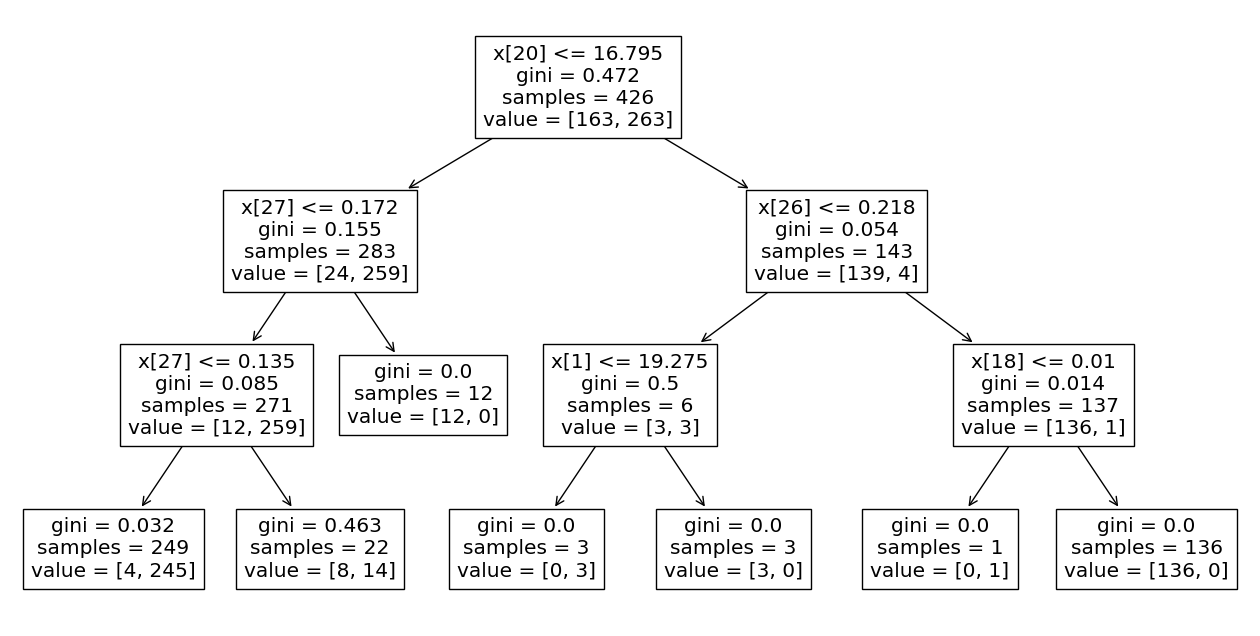

In [ ]:
plt.figure(figsize=(16, 8))
tree.plot_tree(clf);

In [ ]:
r = tree.export_text(clf)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.17
|   |   |--- feature_27 <= 0.13
|   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- class: 1
|   |--- feature_27 >  0.17
|   |   |--- class: 0
|--- feature_20 >  16.80
|   |--- feature_26 <= 0.22
|   |   |--- feature_1 <= 19.28
|   |   |   |--- class: 1
|   |   |--- feature_1 >  19.28
|   |   |   |--- class: 0
|   |--- feature_26 >  0.22
|   |   |--- feature_18 <= 0.01
|   |   |   |--- class: 1
|   |   |--- feature_18 >  0.01
|   |   |   |--- class: 0



In [ ]:
r = tree.export_text(clf, feature_names=cancer['feature_names'].tolist())
print(r)


|--- worst radius <= 16.80
|   |--- worst concave points <= 0.17
|   |   |--- worst concave points <= 0.13
|   |   |   |--- class: 1
|   |   |--- worst concave points >  0.13
|   |   |   |--- class: 1
|   |--- worst concave points >  0.17
|   |   |--- class: 0
|--- worst radius >  16.80
|   |--- worst concavity <= 0.22
|   |   |--- mean texture <= 19.28
|   |   |   |--- class: 1
|   |   |--- mean texture >  19.28
|   |   |   |--- class: 0
|   |--- worst concavity >  0.22
|   |   |--- symmetry error <= 0.01
|   |   |   |--- class: 1
|   |   |--- symmetry error >  0.01
|   |   |   |--- class: 0



In [ ]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.9230769230769231

In [ ]:
i = 3
decision_path = clf.decision_path(X_test[[i]])
print(decision_path.toarray())
clf.predict(X_test[[i]])

[[1 1 1 0 1 0 0 0 0 0 0 0 0]]


array([1])

In [ ]:
X_test[[i]]
y_test[[i]]

array([0])

In [ ]:
j = 13
decision_path = clf.decision_path(X_test[[j]])
print(decision_path.toarray())
clf.predict(X_test[[j]])

[[1 0 0 0 0 0 1 0 0 0 1 0 1]]


array([0])

In [ ]:
y_test[[j]]

array([0])

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=13, ccp_alpha=0.03)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.03, max_depth=3, random_state=13)

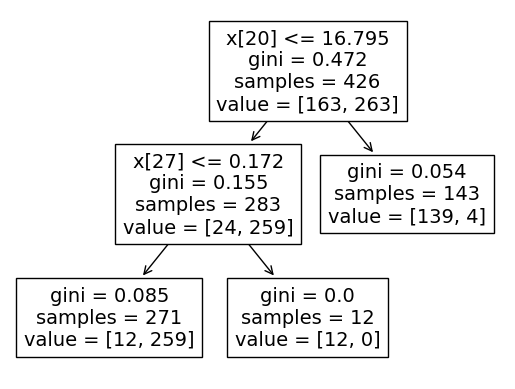

In [ ]:

tree.plot_tree(clf);

In [ ]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.9020979020979021

In [ ]:
j = 13
decision_path = clf.decision_path(X_test[[j]])
print(decision_path.toarray())
clf.predict(X_test[[j]])

[[1 0 0 0 1]]


array([0])

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=13, ccp_alpha=0.1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, random_state=13)

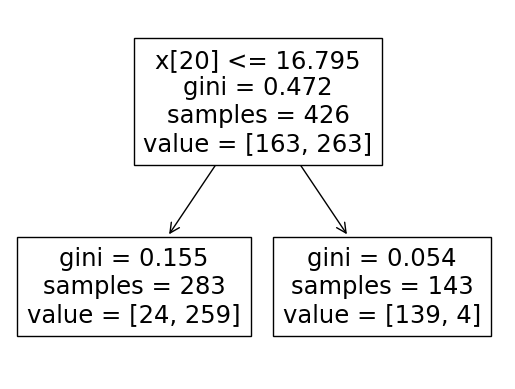

In [ ]:
tree.plot_tree(clf);

In [ ]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.8881118881118881

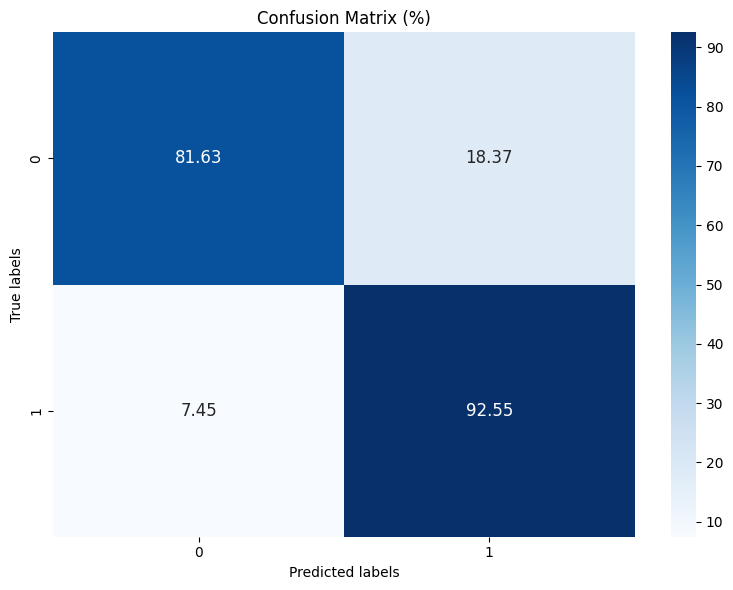

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        49
           1       0.91      0.93      0.92        94

    accuracy                           0.89       143
   macro avg       0.88      0.87      0.87       143
weighted avg       0.89      0.89      0.89       143



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred = clf.predict(X_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))